In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

frame = pd.read_csv("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/july-18-2022-safe/all_values.csv")

In [112]:
df = pd.DataFrame({"volume":frame.columns,
                   "mean": frame.mean().to_frame()[0].values,
                   "std": frame.std().to_frame()[0].values,
                   "var": frame.var().to_frame()[0].values,
                    })

In [46]:
frame.mean().to_frame()[0].values

array([  49.5       , 1056.13768375, 1117.66452128, 1146.83092619,
       1192.71525222, 1176.24627337, 1271.06907276, 1267.1332071 ,
       1312.66472581, 1310.90583305, 1264.96043287, 1319.56669428,
       1339.82149445, 1360.57293827, 1356.1433148 , 1375.7345839 ,
       1344.15132336, 1351.73957495, 1372.52629125, 1362.48470325,
       1381.84383606, 1387.41576943, 1429.47937283, 1430.74172696,
       1421.51489587, 1422.17213811, 1419.63186357, 1500.76957293,
       2048.34894609])

In [4]:
frame.volume *= (3/3.9)

In [12]:
frame.var = pow(frame.perimeter_pb_stdev,2)

In [41]:
frame

,Unnamed: 0,volume,perimeter,perimeter_pb_mean,perimeter_pb_stdev,contour_area,contour_area_pb_mean,contour_area_pb_stdev
0,0,0.2,561.819500,561.897602,0.016022,6181.5,6190.990,0.844748
1,1,0.3,561.328743,561.587700,0.069096,6182.0,6188.250,1.273087
2,2,0.4,557.831540,557.168851,0.303019,6065.5,6067.676,0.800519
3,3,0.5,545.744734,549.535282,2.881586,5826.0,5920.928,61.471872
4,4,0.6,542.349796,542.403645,0.486820,5734.5,5749.558,10.270125
5,5,0.7,546.420238,547.476246,0.822464,5860.5,5872.984,10.201288
6,6,0.8,553.241396,553.654321,1.122502,5990.5,6003.358,18.815561
7,7,0.9,554.390010,554.483988,0.297046,6019.0,6021.084,5.848348
8,8,1.0,559.483762,559.917354,0.369309,6129.0,6151.572,19.488737
9,9,1.1,563.953633,565.027643,0.832041,6250.0,6269.086,11.603736


In [15]:
frame.var
# df = df.drop(28)
# df = df.drop(0)
# df= df.drop(1)
# df = df.drop(14)
# df = df.drop(27)

0     0.000257
1     0.004774
2     0.091821
3     8.303540
4     0.236994
5     0.676446
6     1.260012
7     0.088237
8     0.136389
9     0.692293
10    0.381066
11    0.661058
12    0.749843
13    0.299309
14    0.066858
15    0.473739
16    0.129388
17    3.121971
18    0.428960
19    0.414328
20    0.447195
21    0.182429
22    0.001305
23    0.486558
24    0.720547
25    0.039504
26    0.516934
27    0.448758
28    0.195486
29    0.011656
30    0.256455
31    0.074211
32    0.124673
33    0.174853
34    0.051934
Name: perimeter_pb_stdev, dtype: float64

In [77]:
for key, group in df.groupby('volume'):
    #print(key)
    print(group)
# plt.plot(df['volume'], df['mean'], yerr=df['std'])

  volume         mean       std
2     05  1117.664521  0.897171
  volume         mean      std
3     06  1146.830926  1.52688
  volume         mean       std
4     07  1192.715252  1.508089
  volume         mean      std
5     08  1176.246273  1.49215
  volume         mean       std
6     09  1271.069073  1.426365
  volume         mean       std
7     10  1267.133207  1.483079
  volume         mean       std
8     11  1312.664726  4.112507
  volume         mean       std
9     12  1310.905833  2.559582
   volume         mean       std
10     13  1264.960433  6.420307
   volume         mean       std
11     14  1319.566694  3.774448
   volume         mean       std
12     15  1339.821494  3.952147
   volume         mean       std
13     16  1360.572938  2.397663
   volume         mean        std
14     17  1356.143315  18.565659
   volume         mean       std
15     18  1375.734584  5.626147
   volume         mean       std
16     19  1344.151323  2.815481
   volume         mean      

In [82]:
df.volume

2     05
3     06
4     07
5     08
6     09
7     10
8     11
9     12
10    13
11    14
12    15
13    16
14    17
15    18
16    19
17    20
18    21
19    22
20    23
21    24
22    25
23    26
24    27
25    28
26    29
27    30
Name: volume, dtype: object

Text(0.5, 1.0, 'Light Diffusion Average')

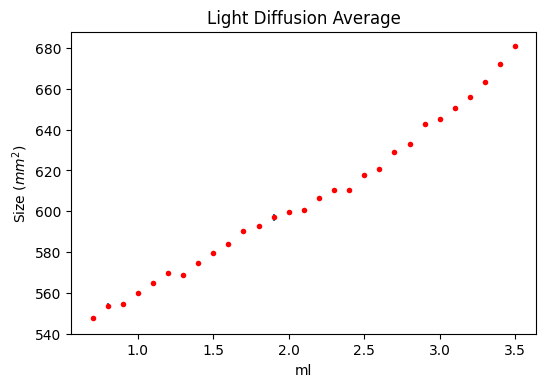

In [43]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

# plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)
startIndex = 5
endIndex = -1
ax.errorbar(frame.volume[startIndex:endIndex], frame.perimeter_pb_mean[startIndex:endIndex], yerr=frame.perimeter_pb_stdev[startIndex:endIndex],
         fmt="o", mfc='red', ms=4, mew=0)#, marker='s', mfc='red',
         #mec='green')#, ms=20, mew=4)
ax.set_ylabel('Size ($mm^2$)')
ax.set_xlabel('ml')
ax.set_title("Light Diffusion Average")

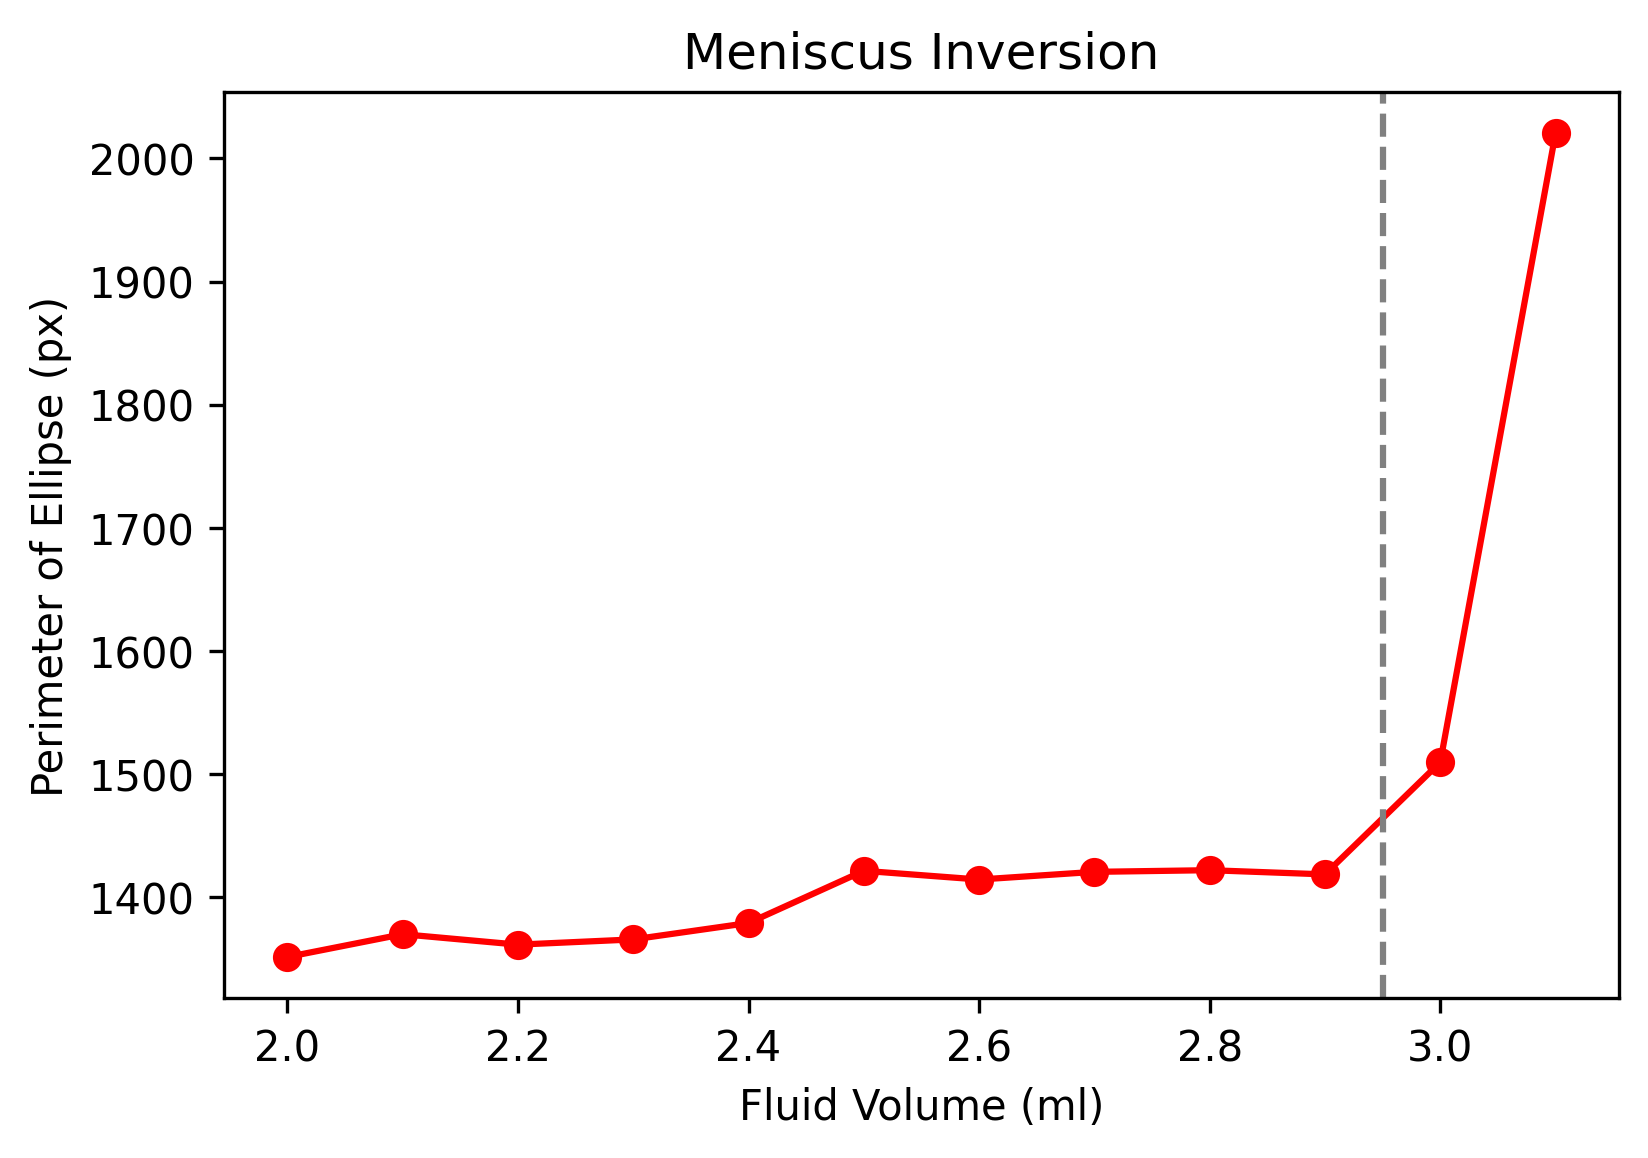

y=21.194402x^2+86.600368x+(1116.178303)


In [63]:
# plt.plot(frame.volume, frame["perimeter_mean"], marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

x= frame.volume;
y=frame["perimeter"];
plt.plot(x[16:],y[16:], 'ro-')
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
#plt.plot(x,p(x),'k--',linewidth=2)
plt.axvline(x=2.95, ls= '--', c ='gray')
color = 0.8;
plt.ylabel('Perimeter of Ellipse (px)')
plt.xlabel('Fluid Volume (ml)')
plt.title("Meniscus Inversion")
plt.savefig('Miniscus-Inversion.png')
plt.show()

print( "y=%fx^2+%fx+(%f)"%(z[0],z[1],z[2]))

In [136]:
frame = frame.drop(26)

<Figure size 432x288 with 0 Axes>